In [18]:
import random
from alive_progress import alive_bar #progress bar for loops
import matplotlib.pyplot as plt

### PART 0: IMPLEMENTATION OF SORTING ALGORITHMS

In [ ]:
#Insertion Sort
def insertionsort(lst): 
    comparisons = 0 
    for i in range(1, len(lst)): 
        key = lst[i] 
        j = i - 1 
        while j >= 0: 
            comparisons += 1 
            if lst[j] > key: 
                lst[j + 1] = lst[j] 
                j -= 1 
            else: 
                break 
            lst[j + 1] = key 
    return (lst, comparisons)

#Merge Sort
# will be used in hybrid algorithm
def merge(l1, l2):
    #print(l1, l2)
    ans = []
    p1 = 0
    p2 = 0
    comparisons = 0
    while p1<len(l1) and p2<len(l2):
        comparisons += 1
        if l1[p1] < l2[p2]:
            ans.append(l1[p1])
            p1+=1
        else:
            ans.append(l2[p2])
            p2+=1
    ans.extend(l1[p1:])
    ans.extend(l2[p2:])
    return (ans, comparisons)

def mergesort(lst):
    if len(lst)<=1:
        return lst, 0
    mid = len(lst)//2
    left, left_comps = mergesort(lst[:mid])
    right, right_comps = mergesort(lst[mid:])
    merged, merge_comps = merge(left, right)
    return merged, left_comps + right_comps + merge_comps

### PART A: HYBRID SORT

In [6]:
#function that integrates the insertion sort and the merge sort logics
def integrate(lst, S=15):
    def hybrid(arr):
        n = len(arr)
        if n <= 1:
            return (list(arr), 0)
        if n <= S:
            return insertionsort(arr)
        mid = n // 2
        left_sorted, left_comp = hybrid(arr[:mid])
        right_sorted, right_comp = hybrid(arr[mid:])
        merged, merge_comp = merge(left_sorted, right_sorted)
        return (merged, left_comp + right_comp + merge_comp)

    return hybrid(lst)

### PART B: GENERATION OF DATASETS

In [8]:
#function to generate datasets (for different sizes)
def generate_datasets(sizes,x): #x is the max value of the random integers
    datasets={}
    for n in sizes:
        datasets[n]=[random.randint(0,x) for _ in range(n)]
    return datasets
sizes=[1000,5000,10000,50000,100000,500000,1000000,5000000,10000000]
datasets=generate_datasets(sizes,1000000000) #dictionary of datasets with key as size

#function to generate multiple datasets (for same size)
def generate_datasets_n(size,number_of_datasets,x): 
    datasets={}
    for n in range(number_of_datasets):
        datasets[n]=[random.randint(0,x) for _ in range(size)]
    return datasets #dictionary of datasets with same size


### PART C: TESTING THE SORTS AND PLOTTING GRAPHS

#### Part C.2 

With the input size n fixed, plot the number of key comparisons over
different values of S. Compare your empirical results with your
theoretical analysis of the time complexity.

In [17]:
# Testing on input size n
n = 10000
number_of_datasets = 100
x = 1000000000
# generate 100 datasets of size n
datasets_c_2 = generate_datasets_n(n, number_of_datasets, x)
print(f"Generated {len(datasets_c_2)} datasets of size {n} for testing.")
s = [x for x in range(1,101)] # S values from 1 to 100
comps_hyb_dict = {} # each S value (key) is mapped to average comparisons (value)
with alive_bar(len(s), title="Comparison counting in progress...", force_tty=True) as bar:
    for i in s:
        avg_comps = 0 #average comparisons for each S value
        for j in datasets_c_2:
            avg_comps += integrate(datasets_c_2[j], i)[1] #adding up comparisons for each S value
        comps_hyb_dict[i] = avg_comps/len(datasets_c_2) #average comparisons for each S value
        bar()

Generated 100 datasets of size 10000 for testing.
Comparison counting in progress... |████████████████████████████████████████| 10


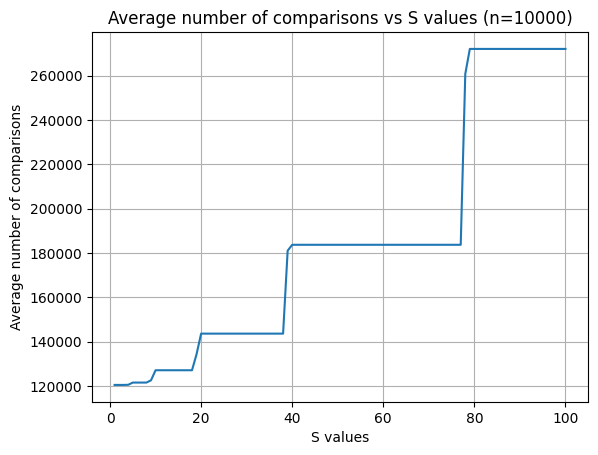

In [23]:
# Plotting average comparisons against varying S values

plt.plot(list(comps_hyb_dict.keys()), list(comps_hyb_dict.values()))
plt.xlabel("S values")
plt.ylabel("Average number of comparisons")
plt.title(f"Average number of comparisons vs S values (n={n})")
plt.grid()
plt.show()

In [24]:
comps_hyb_dict

{1: 120461.1,
 2: 120461.1,
 3: 120461.17,
 4: 120521.16,
 5: 121523.73,
 6: 121523.73,
 7: 121523.73,
 8: 121523.73,
 9: 122543.4,
 10: 127081.99,
 11: 127081.99,
 12: 127081.99,
 13: 127081.99,
 14: 127081.99,
 15: 127081.99,
 16: 127081.99,
 17: 127081.99,
 18: 127081.99,
 19: 134302.81,
 20: 143602.35,
 21: 143602.35,
 22: 143602.35,
 23: 143602.35,
 24: 143602.35,
 25: 143602.35,
 26: 143602.35,
 27: 143602.35,
 28: 143602.35,
 29: 143602.35,
 30: 143602.35,
 31: 143602.35,
 32: 143602.35,
 33: 143602.35,
 34: 143602.35,
 35: 143602.35,
 36: 143602.35,
 37: 143602.35,
 38: 143602.35,
 39: 181023.74,
 40: 183672.92,
 41: 183672.92,
 42: 183672.92,
 43: 183672.92,
 44: 183672.92,
 45: 183672.92,
 46: 183672.92,
 47: 183672.92,
 48: 183672.92,
 49: 183672.92,
 50: 183672.92,
 51: 183672.92,
 52: 183672.92,
 53: 183672.92,
 54: 183672.92,
 55: 183672.92,
 56: 183672.92,
 57: 183672.92,
 58: 183672.92,
 59: 183672.92,
 60: 183672.92,
 61: 183672.92,
 62: 183672.92,
 63: 183672.92,
 64:

### PART C.3

comps_hyb_dict